In [1]:
from experiments.building_on_mit.emb_space import run_tsi_experiment, display_embeddings
import torch
from ts_vae.data_processors.grambow_processor import ReactionDataset
from torch_geometric.data import DataLoader
from torch_geometric.utils import to_dense_batch
import numpy as np
from ts_vae.gaes.nec_gae import NodeEdgeCoord_AE

In [2]:
exp_log = run_tsi_experiment()

Preparing data...
Data prepared.

Preparing models...
Models prepared.

Starting TS interpolation experiment...

===== Training epoch 001 complete with loss: 4.8225 ====
===== Training epoch 002 complete with loss: 4.6141 ====
===== Training epoch 003 complete with loss: 4.3739 ====
===== Training epoch 004 complete with loss: 4.1077 ====

Completed experiment, use the experiment log to print results...


In [41]:
ts_emb_batches = []
batches = []

# get final element of exp_log.embeddings are the final embeddings
for (node_emb, edge_emb, batch) in exp_log.embeddings[-1]:
    ts_emb_batch = to_dense_batch(node_emb, batch.x_ts_batch)
    ts_emb_batches.append(ts_emb_batch[0]) # just append tensors, not true/false values
    batches.append(batch)

# get each ts from batch and put consecutively in list
ts_embs = [ts_emb for ts_emb_batch in ts_emb_batches for ts_emb in ts_emb_batch]

# node_embs = torch.cat(node_embs, dim = 0)

# xs, ys = zip(*TSNE().fit_transform(node_embs.detach().numpy()))
# plt.scatter(xs, ys)
# node_embs.shape

ts_embs[0]

tensor([[-1.495,  0.715],
        [-1.514,  0.685],
        [-1.889,  0.790],
        [-1.788,  0.781],
        [-1.536,  0.684],
        [-1.566,  0.715],
        [-1.473,  0.774],
        [-0.850,  0.412],
        [-0.846,  0.398],
        [-0.840,  0.384],
        [-0.920,  0.394],
        [-0.906,  0.394],
        [-0.853,  0.355],
        [-0.851,  0.345],
        [-0.894,  0.379]], grad_fn=<UnbindBackward>)


In [38]:
ts_embs = [ts_emb for ts_emb_batch in ts_emb_batches for ts_emb in ts_emb_batch]

# xs, ys = zip(*TSNE().fit_transform(ts_embs[0].detach().numpy()))

# have to create a graph embedding! this is just positions to plot
#ts_embs[0].detach().numpy()[0]

len(ts_embs)

320

Preparing data...
Data prepared.
Preparing model...
Model prepared.
Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 9.7701 ====
===== Training epoch 002 complete with loss: 4.9095 ====
===== Training epoch 003 complete with loss: 4.6381 ====
===== Training epoch 004 complete with loss: 4.4627 ====

Completed experiment, printing results as TSNE plot...
1


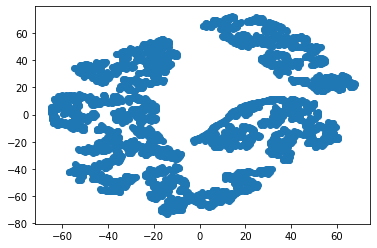

In [1]:
%run -i experiments/model_learning/what_is_learned